<a href="https://colab.research.google.com/github/aish0606/ImageProcessing/blob/main/contour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cp -r /gdrive/MyDrive/DATA .

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('DATA/internal_external.png', 0)

(652, 1080)


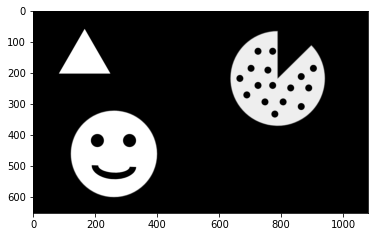

In [6]:
print(img.shape)
plt.imshow(img, cmap='gray')

In [7]:
contour, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [23]:
print(len(contour))
print(hierarchy)
# Here [ 4 -1  1 -1] -1 means external contour
# [ 2 -1 -1  0] 0, 4 & other +ve number means internal contour

22
[[[ 4 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]
  [21  0  5 -1]
  [ 6 -1 -1  4]
  [ 7  5 -1  4]
  [ 8  6 -1  4]
  [ 9  7 -1  4]
  [10  8 -1  4]
  [11  9 -1  4]
  [12 10 -1  4]
  [13 11 -1  4]
  [14 12 -1  4]
  [15 13 -1  4]
  [16 14 -1  4]
  [17 15 -1  4]
  [18 16 -1  4]
  [19 17 -1  4]
  [20 18 -1  4]
  [-1 19 -1  4]
  [-1  4 -1 -1]]]


In [39]:
external_contour = np.zeros(img.shape)

In [40]:
# if we need to draw all the detected contour we can simply call 
# cv2.drawContour and instaed of i pass -1
for i in range(len(contour)):
  # Drawing external contour
  if hierarchy[0][i][3] == -1:
    # if thickness = -1, it will fill the contour
    cv2.drawContours(external_contour, contour, i, 255, 5)
    

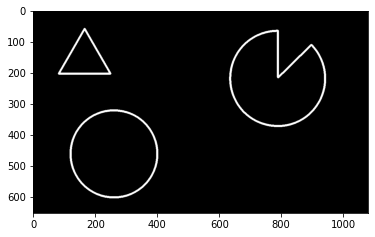

In [41]:
plt.imshow(external_contour, cmap='gray')

In [51]:
internal_contour = np.zeros(img.shape)
for i in range(len(contour)):
  # Internal contour 
  if hierarchy[0][i][3] != -1:
    cv2.drawContours(internal_contour, contour, i, 255, -1)

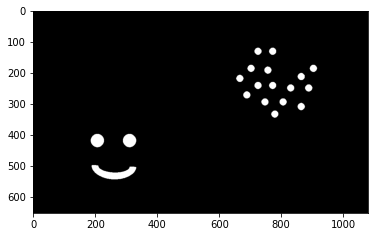

In [52]:
plt.imshow(internal_contour, cmap='gray')

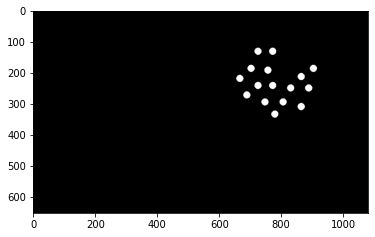

In [54]:
internal_contour = np.zeros(img.shape)
for i in range(len(contour)):
  # Internal contour 
  # [ 6 -1 -1  4] last value of contour is 4
  if hierarchy[0][i][3] == 4:
    cv2.drawContours(internal_contour, contour, i, 255, -1)


plt.imshow(internal_contour, cmap='gray')

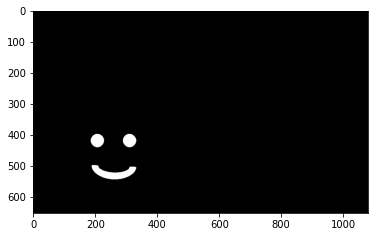

In [56]:
internal_contour = np.zeros(img.shape)
for i in range(len(contour)):
  # Internal contour 
  # [ 2 -1 -1  0] last value of contour is 0
  if hierarchy[0][i][3] == 0:
    cv2.drawContours(internal_contour, contour, i, 255, -1)


plt.imshow(internal_contour, cmap='gray')